In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [83]:
df = pd.read_excel('./dataframes/alarm_data.xlsx')

In [52]:
df.columns

Index(['rounding', 'Nr per 10', 'date', 'unique_alarms_date', 'MsgNr',
       'DateTime', 'Ms', 'State', 'dt', 'Plant', 'Component', 'Text', 'Type',
       'Priority', 'Cat', 'index', 'count1', 'year', 'month', 'week', 'day',
       'hour', 'minute', 'weekday', 'Total_alarms_of_date',
       'alarms_by_date_bins', 'good_bad_outlier', 'is_valid', 'is_weekend',
       'Area', 'Response', 'Year-Month', 'Year-Week'],
      dtype='object')

In [53]:
df["Type"].unique()

array(['Alarm', 'Message', 'Warning'], dtype=object)

# Alarms and warnings


In [8]:
df[['Text',"MsgNr","Type"]].loc[df['MsgNr'].isin([11225, 11226])]

,Text,MsgNr,Type
4592,Druck oberband eintritt hoch,11225,Alarm
10938,Druck oberband eintritt zu hoch,11226,Alarm
10939,Druck oberband eintritt hoch,11225,Alarm
11277,Druck oberband eintritt hoch,11225,Alarm
11285,Druck oberband eintritt zu hoch,11226,Alarm
...,...,...,...
535597,Druck oberband eintritt zu hoch,11226,Alarm
535609,Druck oberband eintritt hoch,11225,Warning
535610,Druck oberband eintritt zu hoch,11226,Alarm
539451,Druck oberband eintritt hoch,11225,Warning


In [9]:
grouped = df.groupby(['MsgNr', 'Type'])['MsgNr'].count()

In [10]:
grouped_filtered = grouped[grouped.index.get_level_values('MsgNr').isin([11225, 11226])]

In [11]:
grouped_filtered

MsgNr  Type   
11225  Alarm       3340
       Warning    18275
11226  Alarm      17271
Name: MsgNr, dtype: int64

In [12]:
grouped_filtered_df = pd.DataFrame(grouped_filtered)

In [13]:
grouped_filtered_df

MsgNr
MsgNr Type          
11225 Alarm     3340
      Warning  18275
11226 Alarm    17271

In [14]:
grouped_filtered_df.rename(columns={'MsgNr':'count'}, inplace=True)

In [15]:
grouped_filtered_df = grouped_filtered_df.reset_index()

In [16]:
grouped_filtered_df

,MsgNr,Type,count
0,11225,Alarm,3340
1,11225,Warning,18275
2,11226,Alarm,17271


<Axes: xlabel='MsgNr', ylabel='count'>

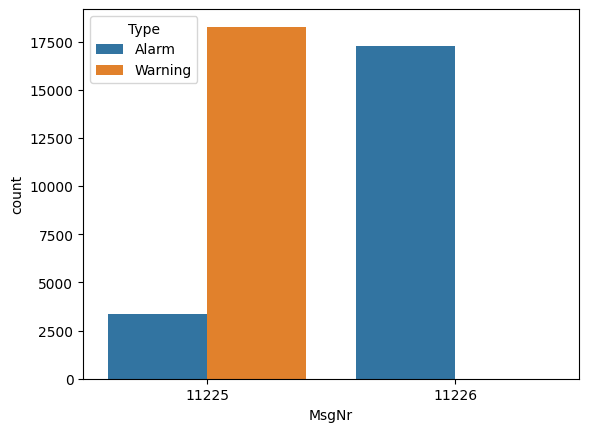

In [17]:
sns.barplot(data=grouped_filtered_df, x='MsgNr', y='count', hue='Type')

In [18]:
df_type = df.groupby(['Type'])['Type'].count()

In [20]:
df_type.head()

Type
Alarm      394596
Message     80537
Warning     66486
Name: Type, dtype: int64

In [22]:
df_type = pd.DataFrame(df_type)
df_type.head()

,Type
Type,
Alarm,394596
Message,80537
Warning,66486


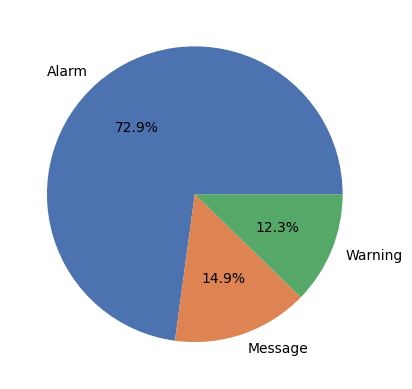

In [26]:
colors = sns.color_palette('deep')[0:5]
plt.pie(df_type['Type'], colors=colors, labels=['Alarm', 'Message','Warning'], autopct='%1.1f%%')
plt.show()

# Alarm explotation

In [54]:
df.head()

,rounding,Nr per 10,date,unique_alarms_date,MsgNr,DateTime,Ms,State,dt,Plant,...,weekday,Total_alarms_of_date,alarms_by_date_bins,good_bad_outlier,is_valid,is_weekend,Area,Response,Year-Month,Year-Week
0,2022-01-01 01:50:00,3,2022-01-01,4,35001,2022-01-01 01:59:04,883,1,0,KÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã...,...,5,25,0,good_day,valid,is_weekend,NaN,Unacknowledged or Fleeting,2021-01,2021-52
1,2022-01-01 01:50:00,3,2022-01-01,4,35001,2022-01-01 01:59:26,905,1,0,KÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã...,...,5,25,0,good_day,valid,is_weekend,NaN,Unacknowledged or Fleeting,2021-01,2021-52
2,2022-01-01 01:50:00,3,2022-01-01,4,35001,2022-01-01 01:59:45,733,1,0,KÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã...,...,5,25,0,good_day,valid,is_weekend,NaN,Unacknowledged or Fleeting,2021-01,2021-52
3,2022-01-01 02:00:00,1,2022-01-01,4,35001,2022-01-01 02:00:22,876,1,0,KÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã...,...,5,25,0,good_day,valid,is_weekend,NaN,NaN,2021-01,2021-52
4,2022-01-01 02:40:00,5,2022-01-01,4,35001,2022-01-01 02:48:24,563,1,0,KÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã...,...,5,25,0,good_day,valid,is_weekend,NaN,Unacknowledged or Fleeting,2021-01,2021-52


In [55]:
df.shape

(541619, 33)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541619 entries, 0 to 541618
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   rounding              541619 non-null  datetime64[ns]
 1   Nr per 10             541619 non-null  int64         
 2   date                  541619 non-null  datetime64[ns]
 3   unique_alarms_date    541619 non-null  int64         
 4   MsgNr                 541619 non-null  int64         
 5   DateTime              541619 non-null  datetime64[ns]
 6   Ms                    541619 non-null  int64         
 7   State                 541619 non-null  int64         
 8   dt                    541619 non-null  int64         
 9   Plant                 541619 non-null  object        
 10  Component             375183 non-null  object        
 11  Text                  541568 non-null  object        
 12  Type                  541619 non-null  object        
 13 

In [57]:
events = pd.DataFrame(df.groupby(df['date'].dt.strftime('%Y-%m'))['date'].count()).rename(columns={'date': 'times'})
events

,times
date,
2022-01,31106
2022-02,32267
2022-03,51353
2022-04,35567
2022-05,39081
2022-06,36618
2022-07,44464
2022-08,82174
2022-09,64075


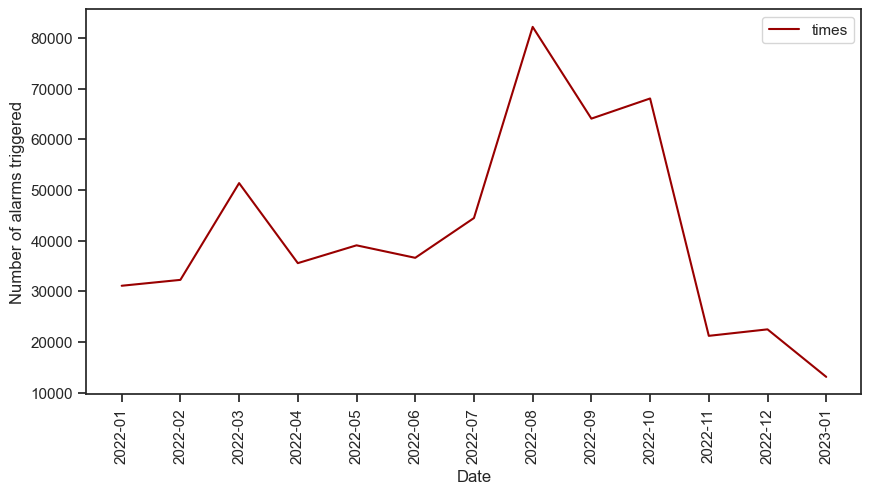

In [58]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.lineplot(data=events, palette=['#990000'])
ax.set_xlabel('Date')
ax.set_ylabel('Number of alarms triggered')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

In [59]:
alarms = pd.DataFrame(df.groupby(['MsgNr'])['MsgNr'].count()).rename(columns={'MsgNr': 'times'}).sort_values(by = ['times'], ascending = False)
alarms

,times
MsgNr,
6279,49531
6280,42735
11231,34212
11232,27315
11225,21615
...,...
26032,1
6300,1
6412,1


In [60]:
alarms.reset_index(inplace=True)
alarms.head()

,MsgNr,times
0,6279,49531
1,6280,42735
2,11231,34212
3,11232,27315
4,11225,21615


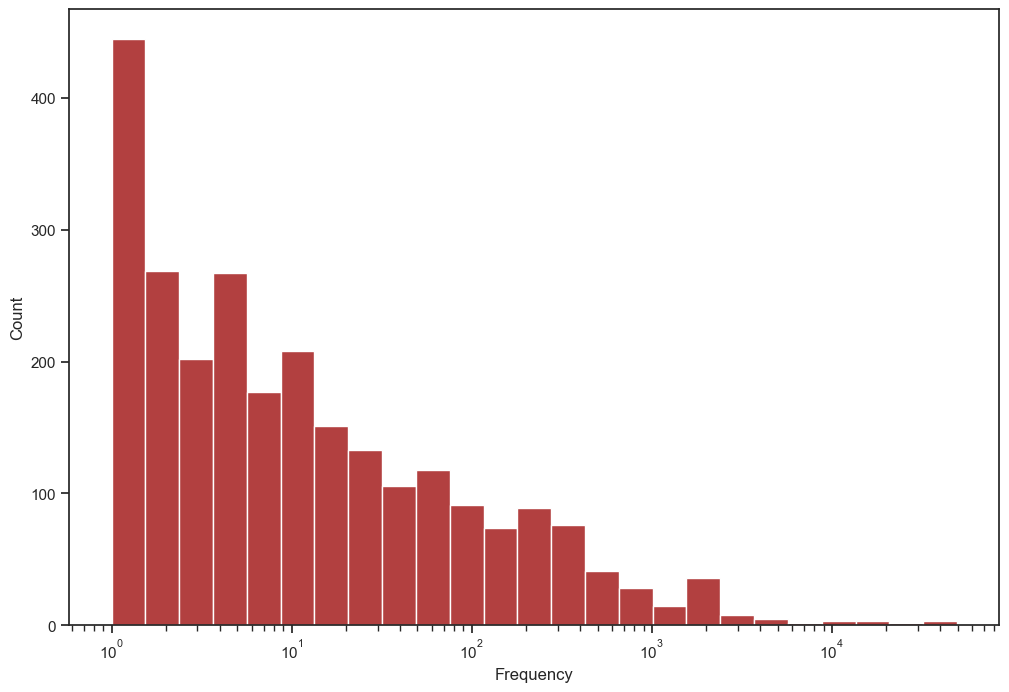

In [61]:
import seaborn as sns

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the histogram
sns.histplot(data=alarms, x='times', ax=ax, color='#990000', log_scale=True)

# Set the axis labels and title)

# Set the axis labels and title
ax.set_xlabel('Frequency')
ax.set_ylabel('Count')


# Show the plot
plt.show()



In [62]:
print('alarms shape: ', alarms.shape, '. Number of events: ', alarms.times.sum())

alarms shape:  (2552, 2) . Number of events:  541619


In [63]:
mean = np.mean(alarms)
std_dev = np.std(alarms)
print('The mean value is: ', mean.times, ' and the st deviation: ', std_dev.times)

The mean value is:  212.23315047021944  and the st deviation:  1807.218147949279


c:\Users\manda\OneDrive - ROCKWOOL Group\Documents\Mthesis\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [64]:
list = [1, 2, 3]
threshold = [(mean.times + i*std_dev.times) for i in list]


In [65]:
mask = [(alarms >= x) for x in threshold]
mask

[      MsgNr  times
 0      True   True
 1      True   True
 2      True   True
 3      True   True
 4      True   True
 ...     ...    ...
 2547   True  False
 2548   True  False
 2549   True  False
 2550   True  False
 2551   True  False
 
 [2552 rows x 2 columns],
       MsgNr  times
 0      True   True
 1      True   True
 2      True   True
 3      True   True
 4      True   True
 ...     ...    ...
 2547   True  False
 2548   True  False
 2549   True  False
 2550   True  False
 2551   True  False
 
 [2552 rows x 2 columns],
       MsgNr  times
 0      True   True
 1      True   True
 2      True   True
 3      True   True
 4      True   True
 ...     ...    ...
 2547   True  False
 2548   True  False
 2549   True  False
 2550   True  False
 2551   True  False
 
 [2552 rows x 2 columns]]

In [66]:
del list

In [67]:
data = df.copy()

In [76]:
df = data.copy()

In [77]:
data_inverse = [alarms[~item].times.sum() for item in mask]
df = [alarms[item].times.sum() for item in mask]
pairs = list(zip(data_inverse, df))
pairs
    

[(194125.0, 347494.0), (246733.0, 294886.0), (265099.0, 276520.0)]

In [78]:
# if error del list del zip


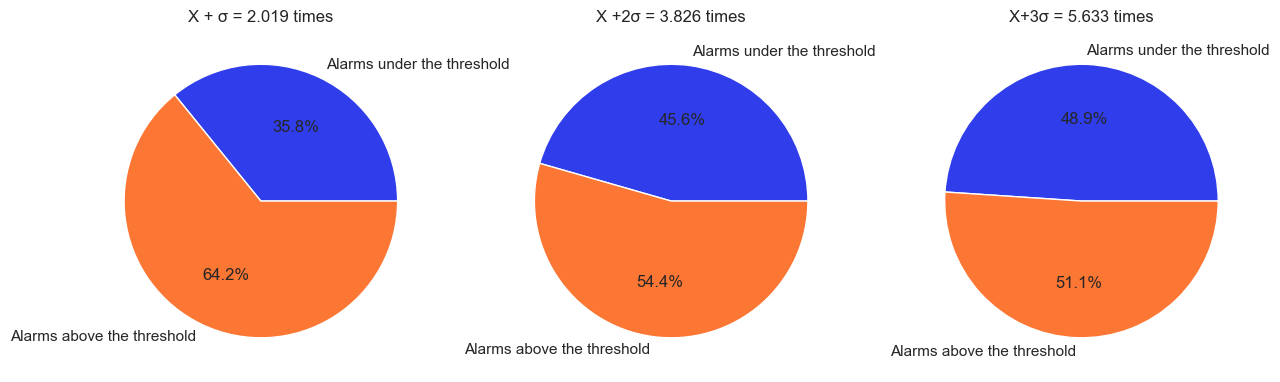

In [79]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
labels = ['Alarms under the threshold', 'Alarms above the threshold']
colors = ['#2F3EEA', '#FC7634']

ax1.pie(pairs[0], labels=labels, colors=colors, autopct='%1.1f%%')
ax1.set_title("X + σ = 2.019 times")

ax2.pie(pairs[1], labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title("X +2σ = 3.826 times")

ax3.pie(pairs[2], labels=labels, colors=colors, autopct='%1.1f%%')
ax3.set_title("X+3σ = 5.633 times")


# Display the pie charts
plt.show()

In [80]:
df

[347494.0, 294886.0, 276520.0]

In [81]:
df = alarms[mask[0]].times
df.dropna(inplace = True)
df = pd.DataFrame(df)

In [72]:
df.times.sum()

347494.0

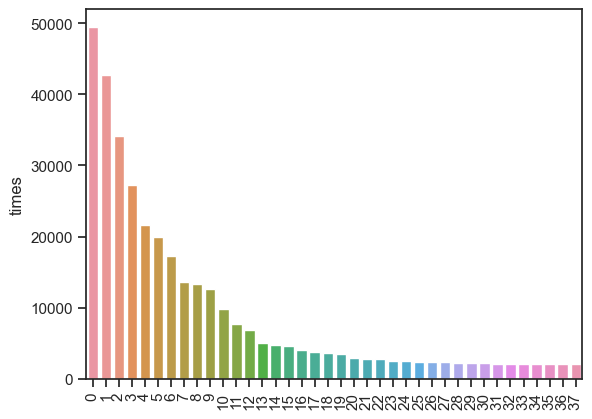

In [73]:
ax = sns.barplot(data=df, x=df.index, y="times")
ax.tick_params(axis='x', labelrotation=90)
plt.show()

In [23]:
relevant_alarms = df.index.tolist()
len(relevant_alarms)

38

In [35]:
df = data[data['MsgNr'].isin(relevant_alarms)]
df.shape

(347494, 33)

In [36]:
df.Component.isna().sum()

71061

In [37]:
df.Component.unique()

array([nan, 'UV39', '8F9-1U8', 'Kupolofen', '2-2.1F8', 'UV015',
       '.10-63.26A3', 'X-Ray', '.10-62.2U3', '.10-61.1U6', 'UV361',
       '.10-65.22U4/8', '.10-61.1U3', '.10-63.21U8', '.2-3.15M2', 'UV 8'],
      dtype=object)

In [38]:
# df.to_csv('data_filtered.csv')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [39]:
df = pd.read_csv('data_filtered.csv')
df.head()

,Unnamed: 0,rounding,Nr per 10,date,unique_alarms_date,MsgNr,DateTime,Ms,State,dt,...,weekday,Total_alarms_of_date,alarms_by_date_bins,good_bad_outlier,is_valid,is_weekend,Area,Response,Year-Month,Year-Week
0,460,2022-01-03 05:40:00,1,2022-01-03,140,50217,2022-01-03 05:49:49,851,1,0,...,0,430,0,good_day,valid,is_weekday,Packing,Acknowledged,2022-01,2022-01
1,602,2022-01-03 08:40:00,10,2022-01-03,140,15042,2022-01-03 08:41:45,571,1,0,...,0,430,0,good_day,valid,is_weekday,Melting and Spinning,Acknowledged,2022-01,2022-01
2,606,2022-01-03 08:40:00,10,2022-01-03,140,4074,2022-01-03 08:44:22,129,1,0,...,0,430,0,good_day,valid,is_weekday,Melting and Spinning,Acknowledged,2022-01,2022-01
3,609,2022-01-03 08:40:00,10,2022-01-03,140,15042,2022-01-03 08:46:40,908,1,0,...,0,430,0,good_day,valid,is_weekday,Melting and Spinning,Unacknowledged or Fleeting,2022-01,2022-01
4,621,2022-01-03 09:00:00,6,2022-01-03,140,15042,2022-01-03 09:07:11,731,1,0,...,0,430,0,good_day,valid,is_weekday,Melting and Spinning,Unacknowledged or Fleeting,2022-01,2022-01


In [29]:
grouped = df.groupby(['Component', 'Plant'])['Component'].count()
grouped = grouped.to_frame().rename(columns={'Component': 'times'}).reset_index()
grouped

,Component,Plant,times
0,.10-61.1U3,CO_Curingoven,38886
1,.10-61.1U6,CO_Curingoven,22464
2,.10-62.2U3,CO_Curingoven,61527
3,.10-63.21U8,Sammelkam.,2844
4,.10-63.26A3,Abfallbeh. UV42,2763
5,.10-65.22U4/8,Sammelkam.,92266
6,.2-3.15M2,Sammelkam.,5035
7,2-2.1F8,Schw.SpaltsÃ¤g,1908
8,2-2.1F8,Schw.SpaltsÃƒÂ¤g,489
9,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚Â¤g,136


In [40]:
grouped.times.sum()

276433

In [41]:
sum_scores = grouped.loc[grouped['Plant'] == 'CO_Curingoven', 'times'].sum()
sum_scores

122877

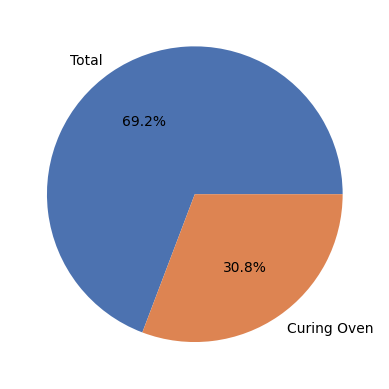

In [42]:
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,5)
df2 = [grouped.times.sum(), grouped.loc[grouped['Plant'] == 'CO_Curingoven', 'times'].sum()]
colors = sns.color_palette('deep')[0:5]
plt.pie(df2, colors=colors, labels=['Total', 'Curing Oven'], autopct='%1.1f%%')

plt.show()

In [43]:
grouped = df.groupby(['Component', 'MsgNr'])['Component'].count()
grouped = grouped.to_frame().rename(columns={'Component': 'times'}).reset_index()
grouped

,Component,MsgNr,times
0,.10-61.1U3,11225,21615
1,.10-61.1U3,11226,17271
2,.10-61.1U6,11227,12617
3,.10-61.1U6,11228,9847
4,.10-62.2U3,11231,34212
5,.10-62.2U3,11232,27315
6,.10-63.21U8,6269,2844
7,.10-63.26A3,24324,2763
8,.10-65.22U4/8,6279,49531
9,.10-65.22U4/8,6280,42735


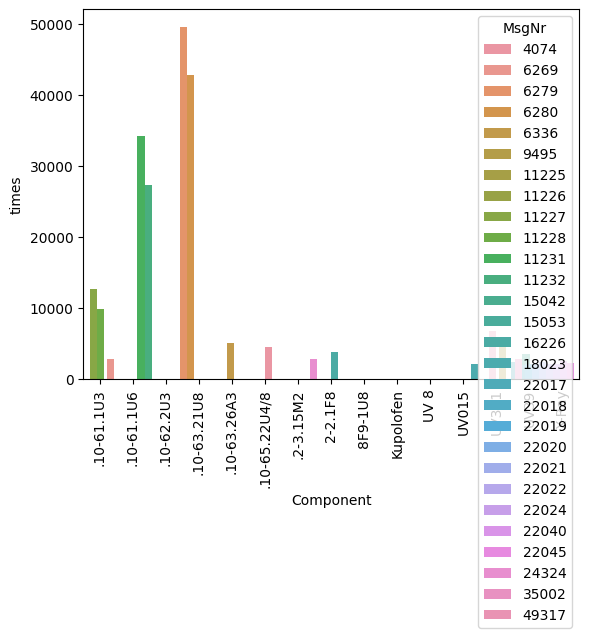

In [44]:
s = sns.barplot(data=grouped, x='Component', y='times', hue='MsgNr', dodge='False', width=6)
s.tick_params(axis='x', labelrotation=90)
plt.show()

In [41]:
# df_filtered_bck = df.copy()
# df = df_filtered_bck

In [45]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace = True)
df

,Unnamed: 0,rounding,Nr per 10,date,unique_alarms_date,MsgNr,Ms,State,dt,Plant,...,weekday,Total_alarms_of_date,alarms_by_date_bins,good_bad_outlier,is_valid,is_weekend,Area,Response,Year-Month,Year-Week
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 05:49:49,460,2022-01-03 05:40:00,1,2022-01-03,140,50217,851,1,0,L-Ende UV136,...,0,430,0,good_day,valid,is_weekday,Packing,Acknowledged,2022-01,2022-01
2022-01-03 08:41:45,602,2022-01-03 08:40:00,10,2022-01-03,140,15042,571,1,0,Emissionsmessung,...,0,430,0,good_day,valid,is_weekday,Melting and Spinning,Acknowledged,2022-01,2022-01
2022-01-03 08:44:22,606,2022-01-03 08:40:00,10,2022-01-03,140,4074,129,1,0,Rekuperator,...,0,430,0,good_day,valid,is_weekday,Melting and Spinning,Acknowledged,2022-01,2022-01
2022-01-03 08:46:40,609,2022-01-03 08:40:00,10,2022-01-03,140,15042,908,1,0,Emissionsmessung,...,0,430,0,good_day,valid,is_weekday,Melting and Spinning,Unacknowledged or Fleeting,2022-01,2022-01
2022-01-03 09:07:11,621,2022-01-03 09:00:00,6,2022-01-03,140,15042,731,1,0,Emissionsmessung,...,0,430,0,good_day,valid,is_weekday,Melting and Spinning,Unacknowledged or Fleeting,2022-01,2022-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31 23:59:13,541613,2023-01-31 23:50:00,51,2023-01-31,167,22021,613,1,0,Wickler,...,1,765,0,good_day,valid,is_weekday,Packing,Unacknowledged or Fleeting,2023-01,2023-05
2023-01-31 23:59:13,541614,2023-01-31 23:50:00,51,2023-01-31,167,22022,613,1,0,Wickler,...,1,765,0,good_day,valid,is_weekday,Packing,Unacknowledged or Fleeting,2023-01,2023-05
2023-01-31 23:59:14,541615,2023-01-31 23:50:00,51,2023-01-31,167,22040,478,1,0,Wickler,...,1,765,0,good_day,valid,is_weekday,Packing,Unacknowledged or Fleeting,2023-01,2023-05


In [46]:
df['seconds_diff'] = df.index.to_series().diff().dt.total_seconds()
df['dependence_bigger10min'] = df['seconds_diff'].apply(lambda s: 0 if s<=600 else 1)
df['dependence_5-10min'] = df['seconds_diff'].apply(lambda s: 1 if s<600 and s>=300 else 0)
df['dependence_1-5min'] = df['seconds_diff'].apply(lambda s: 1 if s<300 and s>60 else 0)
df['dependence_1min'] = df['seconds_diff'].apply(lambda s: 0 if s<=60 else 1)
df.head()

,Unnamed: 0,rounding,Nr per 10,date,unique_alarms_date,MsgNr,Ms,State,dt,Plant,...,is_weekend,Area,Response,Year-Month,Year-Week,seconds_diff,dependence_bigger10min,dependence_5-10min,dependence_1-5min,dependence_1min
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 05:49:49,460,2022-01-03 05:40:00,1,2022-01-03,140,50217,851,1,0,L-Ende UV136,...,is_weekday,Packing,Acknowledged,2022-01,2022-01,NaN,1,0,0,1
2022-01-03 08:41:45,602,2022-01-03 08:40:00,10,2022-01-03,140,15042,571,1,0,Emissionsmessung,...,is_weekday,Melting and Spinning,Acknowledged,2022-01,2022-01,10316.0,1,0,0,1
2022-01-03 08:44:22,606,2022-01-03 08:40:00,10,2022-01-03,140,4074,129,1,0,Rekuperator,...,is_weekday,Melting and Spinning,Acknowledged,2022-01,2022-01,157.0,0,0,1,1
2022-01-03 08:46:40,609,2022-01-03 08:40:00,10,2022-01-03,140,15042,908,1,0,Emissionsmessung,...,is_weekday,Melting and Spinning,Unacknowledged or Fleeting,2022-01,2022-01,138.0,0,0,1,1
2022-01-03 09:07:11,621,2022-01-03 09:00:00,6,2022-01-03,140,15042,731,1,0,Emissionsmessung,...,is_weekday,Melting and Spinning,Unacknowledged or Fleeting,2022-01,2022-01,1231.0,1,0,0,1


In [47]:
df.shape

(347494, 38)

In [48]:
df[['dependence_bigger10min','dependence_5-10min','dependence_1-5min','dependence_1min']].sum()

dependence_bigger10min     8994
dependence_5-10min        10336
dependence_1-5min         62030
dependence_1min           81374
dtype: int64

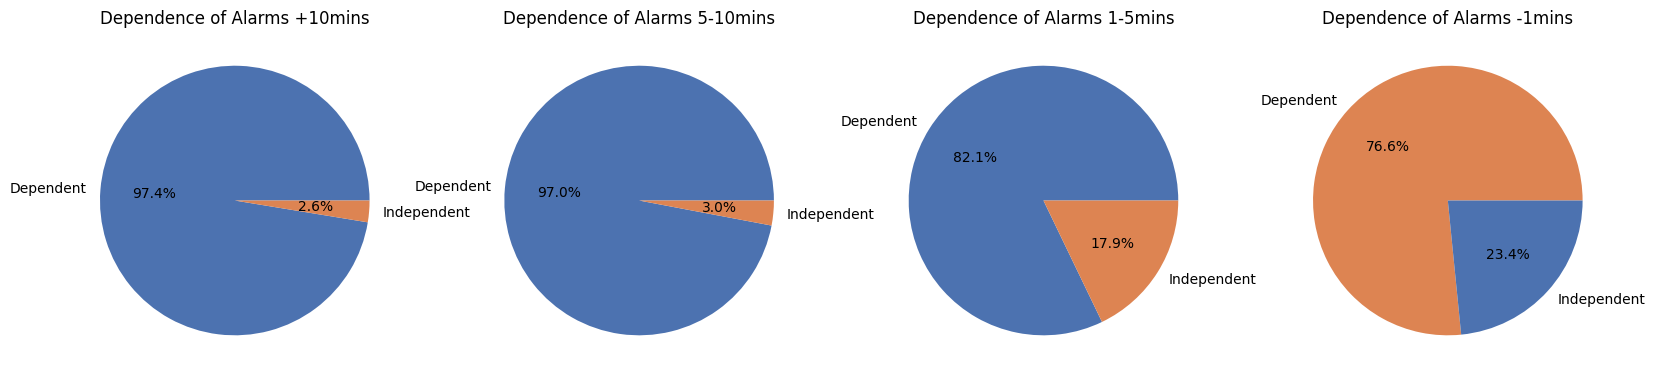

In [49]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,5))
colors = sns.color_palette("deep")
new_colors = colors[::-1]
counts1 = df['dependence_bigger10min'].value_counts()
ax1.pie(counts1, colors=colors, labels=['Dependent', 'Independent'], autopct='%1.1f%%')
ax1.set_title('Dependence of Alarms +10mins')

counts2 = df['dependence_5-10min'].value_counts()
ax2.pie(counts2, colors=colors, labels=['Dependent', 'Independent'], autopct='%1.1f%%')
ax2.set_title('Dependence of Alarms 5-10mins')

counts3 = df['dependence_1-5min'].value_counts()
ax3.pie(counts3, colors=colors, labels=['Dependent', 'Independent'], autopct='%1.1f%%')
ax3.set_title('Dependence of Alarms 1-5mins')

counts4 = df['dependence_1min'].value_counts()
colors = [colors[1], colors[0]]
ax4.pie(counts4, colors=colors, labels=['Dependent', 'Independent'], autopct='%1.1f%%')
ax4.set_title('Dependence of Alarms -1mins')


# Display the pie charts
plt.show()


In [50]:
df['inverted'] = df.dependence_1min.shift()
df['output'] = 0
df.loc[df.dependence_1min==0, 'output'] = df[df.dependence_1min==0].inverted.cumsum()
df[:30]

,Unnamed: 0,rounding,Nr per 10,date,unique_alarms_date,MsgNr,Ms,State,dt,Plant,...,Response,Year-Month,Year-Week,seconds_diff,dependence_bigger10min,dependence_5-10min,dependence_1-5min,dependence_1min,inverted,output
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 05:49:49,460,2022-01-03 05:40:00,1,2022-01-03,140,50217,851,1,0,L-Ende UV136,...,Acknowledged,2022-01,2022-01,NaN,1,0,0,1,NaN,0
2022-01-03 08:41:45,602,2022-01-03 08:40:00,10,2022-01-03,140,15042,571,1,0,Emissionsmessung,...,Acknowledged,2022-01,2022-01,10316.0,1,0,0,1,1.0,0
2022-01-03 08:44:22,606,2022-01-03 08:40:00,10,2022-01-03,140,4074,129,1,0,Rekuperator,...,Acknowledged,2022-01,2022-01,157.0,0,0,1,1,1.0,0
2022-01-03 08:46:40,609,2022-01-03 08:40:00,10,2022-01-03,140,15042,908,1,0,Emissionsmessung,...,Unacknowledged or Fleeting,2022-01,2022-01,138.0,0,0,1,1,1.0,0
2022-01-03 09:07:11,621,2022-01-03 09:00:00,6,2022-01-03,140,15042,731,1,0,Emissionsmessung,...,Unacknowledged or Fleeting,2022-01,2022-01,1231.0,1,0,0,1,1.0,0
2022-01-03 09:16:48,623,2022-01-03 09:10:00,4,2022-01-03,140,50217,111,1,0,L-Ende UV136,...,Unacknowledged or Fleeting,2022-01,2022-01,577.0,0,1,0,1,1.0,0
2022-01-03 09:17:02,624,2022-01-03 09:10:00,4,2022-01-03,140,9352,328,1,0,ACON/E-Welle,...,Acknowledged,2022-01,2022-01,14.0,0,0,0,0,1.0,1
2022-01-03 09:17:48,625,2022-01-03 09:10:00,4,2022-01-03,140,9219,533,1,0,ACON/E-Welle,...,Unacknowledged or Fleeting,2022-01,2022-01,46.0,0,0,0,0,0.0,1
2022-01-03 09:28:03,628,2022-01-03 09:20:00,3,2022-01-03,140,49317,428,1,0,BiMi-Lager,...,Acknowledged,2022-01,2022-01,615.0,1,0,0,1,0.0,0


In [51]:
number_of_blocks = int(df.output.max())
number_of_blocks

47597

In [52]:
grouped = df.groupby(['output'])['output'].count()
# grouped = grouped.to_frame().rename(columns={'duration': 'times'}).sort_values(by=['times'], ascending = True, inplace = True)
grouped = grouped.to_frame().drop(0).rename(columns={'output': 'times'}).sort_values(by=['times'])
grouped

,times
output,
20268,1
13880,1
13879,1
42842,1
13877,1
...,...
47325,615
44045,701
42707,726


In [40]:
df = df[df['output'] == 47329]
df

,rounding,Nr per 10,date,unique_alarms_date,MsgNr,Ms,State,dt,Plant,Component,...,Response,Year-Month,Year-Week,seconds_diff,dependence_bigger10min,dependence_5-10min,dependence_1-5min,dependence_1min,inverted,output
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-12-30 02:40:08,2022-12-30 02:40:00,151,2022-12-30,36,35002,949,1,0,KÃƒÂ¼hlwasser,UV 8,...,Unacknowledged or Fleeting,2022-12,2022-52,0.0,0,0,0,0,1.0,47329
2022-12-30 02:40:31,2022-12-30 02:40:00,151,2022-12-30,36,35002,55,1,0,KÃ¼hlwasser,UV 8,...,Unacknowledged or Fleeting,2022-12,2022-52,23.0,0,0,0,0,0.0,47329
2022-12-30 02:40:31,2022-12-30 02:40:00,151,2022-12-30,36,35002,55,1,0,KÃƒÂ¼hlwasser,UV 8,...,Unacknowledged or Fleeting,2022-12,2022-52,0.0,0,0,0,0,0.0,47329
2022-12-30 02:40:51,2022-12-30 02:40:00,151,2022-12-30,36,35002,67,1,0,KÃƒÂ¼hlwasser,UV 8,...,NaN,2022-12,2022-52,20.0,0,0,0,0,0.0,47329
2022-12-30 02:40:51,2022-12-30 02:40:00,151,2022-12-30,36,35002,67,1,0,KÃ¼hlwasser,UV 8,...,Unacknowledged or Fleeting,2022-12,2022-52,0.0,0,0,0,0,0.0,47329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 06:41:19,2022-12-30 06:40:00,67,2022-12-30,36,35002,515,1,0,KÃ¼hlwasser,UV 8,...,Unacknowledged or Fleeting,2022-12,2022-52,0.0,0,0,0,0,0.0,47329
2022-12-30 06:41:58,2022-12-30 06:40:00,67,2022-12-30,36,35002,29,1,0,KÃ¼hlwasser,UV 8,...,Unacknowledged or Fleeting,2022-12,2022-52,39.0,0,0,0,0,0.0,47329
2022-12-30 06:41:58,2022-12-30 06:40:00,67,2022-12-30,36,35002,29,1,0,KÃƒÂ¼hlwasser,UV 8,...,NaN,2022-12,2022-52,0.0,0,0,0,0,0.0,47329


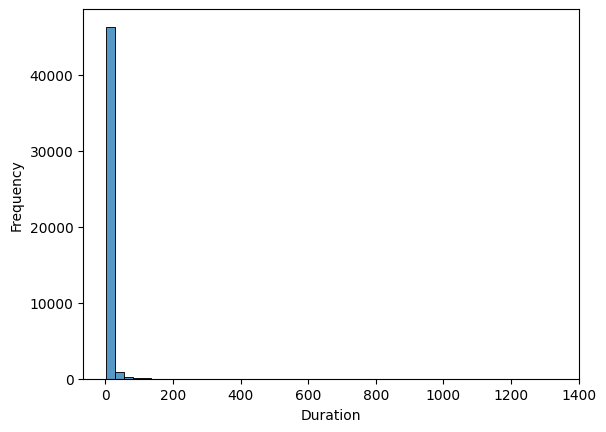

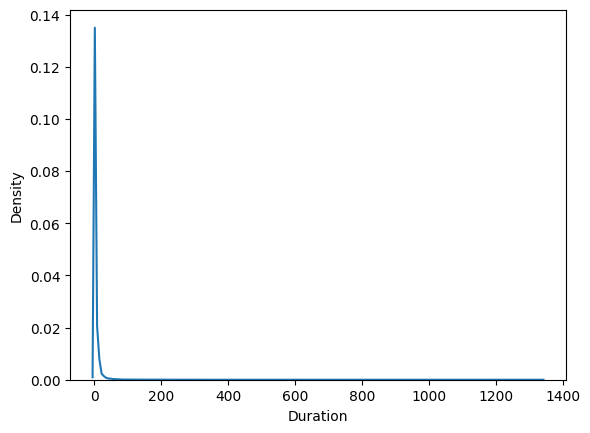

In [53]:
sns.histplot(grouped['times'], bins=50)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

# Plot a density plot of the duration column using seaborn
sns.kdeplot(grouped['times'])
plt.xlabel('Duration')
plt.show()

In [54]:
grouped = grouped[grouped.times< grouped.quantile(q=0.95).times]
grouped.shape
# grouped_bck = grouped.copy()

(45161, 1)

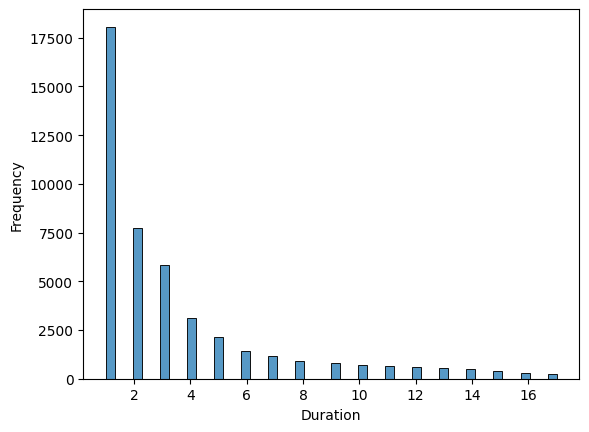

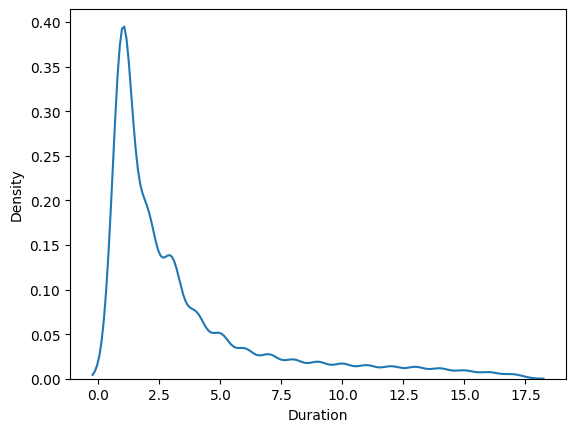

In [55]:
sns.histplot(grouped['times'], bins=50)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

# Plot a density plot of the duration column using seaborn
sns.kdeplot(grouped['times'])
plt.xlabel('Duration')
plt.show()

In [57]:
df

,Unnamed: 0,rounding,Nr per 10,date,unique_alarms_date,MsgNr,Ms,State,dt,Plant,...,Year-Week,seconds_diff,dependence_bigger10min,dependence_5-10min,dependence_1-5min,dependence_1min,inverted,output,new_output,sequences
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 05:49:49,460,2022-01-03 05:40:00,1,2022-01-03,140,50217,851,1,0,L-Ende UV136,...,2022-01,NaN,1,0,0,1,NaN,0,0.0,0
2022-01-03 08:41:45,602,2022-01-03 08:40:00,10,2022-01-03,140,15042,571,1,0,Emissionsmessung,...,2022-01,10316.0,1,0,0,1,1.0,0,0.0,0
2022-01-03 08:44:22,606,2022-01-03 08:40:00,10,2022-01-03,140,4074,129,1,0,Rekuperator,...,2022-01,157.0,0,0,1,1,1.0,0,0.0,0
2022-01-03 08:46:40,609,2022-01-03 08:40:00,10,2022-01-03,140,15042,908,1,0,Emissionsmessung,...,2022-01,138.0,0,0,1,1,1.0,0,0.0,0
2022-01-03 09:07:11,621,2022-01-03 09:00:00,6,2022-01-03,140,15042,731,1,0,Emissionsmessung,...,2022-01,1231.0,1,0,0,1,1.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31 23:59:13,541613,2023-01-31 23:50:00,51,2023-01-31,167,22021,613,1,0,Wickler,...,2023-05,0.0,0,0,0,0,0.0,47597,47597.0,47597
2023-01-31 23:59:13,541614,2023-01-31 23:50:00,51,2023-01-31,167,22022,613,1,0,Wickler,...,2023-05,0.0,0,0,0,0,0.0,47597,47597.0,47597
2023-01-31 23:59:14,541615,2023-01-31 23:50:00,51,2023-01-31,167,22040,478,1,0,Wickler,...,2023-05,1.0,0,0,0,0,0.0,47597,47597.0,47597


In [56]:
df['new_output'] = df['output'].shift(-1)
df['sequences'] = df['output']
df.loc[df['new_output'] >= df['output'], 'sequences'] = df['new_output']
df[:15]

C:\Users\manda\AppData\Local\Temp\ipykernel_24876\517763064.py:3: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  df.loc[df['new_output'] >= df['output'], 'sequences'] = df['new_output']


ValueError: cannot reindex on an axis with duplicate labels

In [ ]:
df['new_output'] = df['output'].shift(-1)
df['sequences'] = df['output']
df.loc[df['new_output'] >= df['output'], 'sequences'] = df['new_output']
df[:15]

C:\Users\manda\AppData\Local\Temp\ipykernel_24876\517763064.py:3: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  df.loc[df['new_output'] >= df['output'], 'sequences'] = df['new_output']


ValueError: cannot reindex on an axis with duplicate labels

In [48]:
df.to_csv('./dataframes/clean_data.csv')